In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
import zipfile

# Caminho do arquivo zip no seu sistema local
path = "Material.zip"

# Abrindo o arquivo zip
with zipfile.ZipFile(path, 'r') as zip_ref:
    # Extraindo todo o conteúdo do zip para o diretório atual
    zip_ref.extractall('./')

print("Arquivo descompactado com sucesso!")


Arquivo descompactado com sucesso!


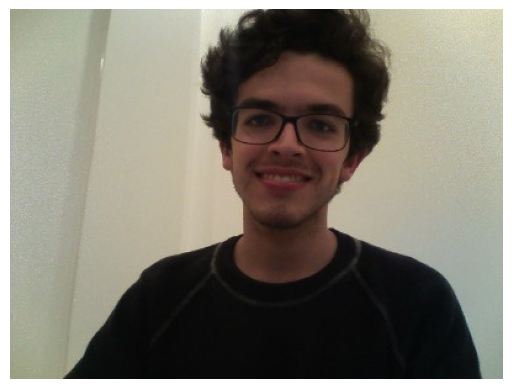

In [3]:
imagem = cv2.imread('Material/testes/teste_gabriel.png')

# Convertendo a imagem de BGR (OpenCV) para RGB (matplotlib)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Exibindo a imagem com matplotlib
plt.imshow(imagem_rgb)
plt.axis('off')  # Para esconder os eixos
plt.show()

In [4]:
imagem.shape #o 3 indica q e uma imagem colorida RBG

(300, 400, 3)

In [5]:
cascade_faces = "Material/haarcascade_frontalface_default.xml"  # Caminho para o arquivo Haar Cascade usado para detectar faces
caminho_modelo = "Material/modelo_01_expressoes.h5"  # Caminho para o modelo treinado de reconhecimento de expressões faciais
face_detection = cv2.CascadeClassifier(cascade_faces)  # Carrega o classificador de faces para detectar rostos nas imagens
classificador_emocoes = load_model(caminho_modelo, compile=True)  # Carrega o modelo de emoções treinado (expressoes faciais)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]  # Lista das emoções que o modelo pode identificar


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: Error when deserializing class 'Conv2D' using config={'name': 'conv2d_8', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None, 'dtype': 'float32'}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {'dtype': 'float32'}}, 'kernel_regularizer': {'class_name': 'L1L2', 'config': {'l1': 0.0, 'l2': 0.009999999776482582}}, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'input_shape': [None, 48, 48, 1]}.

Exception encountered: <class 'keras.src.initializers.random_initializers.GlorotUniform'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None, 'dtype': 'float32'}, 'registered_name': None}.

Exception encountered: GlorotUniform.__init__() got an unexpected keyword argument 'dtype'

In [ ]:
original = imagem.copy() #imagem original
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20,20)) #faces detectadas na iamgem(neste caso, apenas uma)

In [ ]:
faces #128x128 sera o retangulo em volta do rosto

In [ ]:
len(faces)

In [ ]:
faces.shape #1 linha por 4 caracteristas

In [ ]:
# Converter para escala de cinza
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

# Exibir a imagem
plt.imshow(cinza, cmap='gray')  # Usar o cmap 'gray' para exibir a imagem em tons de cinza
plt.axis('off')  # Desligar os eixos para uma melhor visualização
plt.show()


In [ ]:
cinza.shape #nao tem mais o valor 3, ou seja, nao e mais colorida

In [ ]:
roi = cinza[40:40 + 128, 162:162 + 128] #extraindo apenas o rosto, com a box anteriormente citada

In [ ]:
plt.imshow(roi, cmap='gray')
plt.axis('off')  
plt.show()

In [ ]:
roi.shape #apenas o quadrado da iamgem do rosto, fara isto para a extracoes das emocoes

In [ ]:
roi

In [ ]:
roi = cv2.resize(roi, (48, 48)) #diminuiu as dimensoes da imagem, para demorar menos para a rede neural

# Exibir a ROI redimensionada
plt.imshow(roi, cmap='gray')
plt.axis('off')  # Remover os eixos
plt.show()

In [ ]:
roi.dtype #todos os dados sao numeros inteiros

In [ ]:
roi = roi.astype('float') #converter para float, para permitir a manipulacao entre 0 e 1
roi.dtype

In [ ]:
roi

In [ ]:
roi = roi / 255 #deixar entre 0 e 1 para processar mais rapido
roi

In [ ]:
roi = img_to_array(roi) #chamar a funcao para colocarmos em 3 dimensoes em vez de duas
roi

In [ ]:
roi = np.expand_dims(roi, axis = 0) #uma imagem com 48 de largura e altura e um canal, formato que o tensorflow requer

In [ ]:
roi.shape

In [ ]:
preds = classificador_emocoes.predict(roi)[0] #acessar a primeira posicao, visto no shape a cima
preds #ira retornar uma prob para cada uma das classes

In [ ]:
len(preds)#checar para ver se bate com o numero de classes

In [ ]:
emotion_probability = np.max(preds) #pega o valor maximo
emotion_probability

In [ ]:
preds.argmax() #qual o indice para associar

In [ ]:
label = expressoes[preds.argmax()] #associa para dar a repsotas de qual a emocao da imagem
label

In [23]:
#coloca o texto feliz na cabeca
cv2.putText(original, label, (162, 40 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
#desenha o retangulo em volta da cabeca para realizar a previsao
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (0, 0, 255), 2)
cv2_imshow(original)

NameError: name 'label' is not defined

In [ ]:
#barra de progresso
probabilidades = np.ones((250,300,3), dtype= 'uint8') * 255
probabilidades

In [ ]:
probabilidades.shape

In [ ]:
#pega a imagem original
cv2_imshow(original)
if len(faces) == 1: #somente alcoar as barras se tiver uma cara
#faz os textos das emocoes e quais as probabilidade de cada
  for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
    #print(i, emotion, prob)
#coloca os retangulos de probabilidades(quanto maior, mais provavel), sendo apenas uma questao de visualizacao
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probabilidades, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probabilidades, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
cv2_imshow(probabilidades)